In [1]:
# import import_ipynb
# from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

# with the new api
from importnb import imports
with imports("ipynb"):
    from utils import df_from_csv, df_pm25_to_df_aqi, plot_hist, plot_boxes, plot_lines, df_to_csv

PM2.5: 35.9, AQI: 102
PM2.5: 35.9, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 35.5, Max: 55.4
AQI: 102, Measure Level: MeasureLevels.UNHEALTHY_FOR_SENSITIVE_GROUPS, Range Values: Min: 101, Max: 150


## PM2.5 to AQI

In [2]:
# Load Raw Data
df_pm25_clean = df_from_csv("pm25_clean.csv", datafolder="1_clean")

# Check Data Types
print(df_pm25_clean.dtypes)

df_pm25_clean.head()

TANGARA_260A    float64
TANGARA_4B1A    float64
TANGARA_14D6    float64
TANGARA_2B42    float64
TANGARA_2E9A    float64
TANGARA_2FF6    float64
TANGARA_307A    float64
TANGARA_1712    float64
TANGARA_48C6    float64
TANGARA_532E    float64
TANGARA_F1AE    float64
TANGARA_06BE    float64
dtype: object


,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,
2023-10-29 00:00:30-05:00,16.0,17.0,27.0,16.0,6.0,16.0,12.0,13.0,5.0,15.0,12.0,15.0
2023-10-29 00:01:00-05:00,19.0,14.0,26.0,15.0,8.0,15.0,14.0,11.0,11.0,16.0,12.0,12.0
2023-10-29 00:01:30-05:00,20.0,13.0,26.0,15.0,9.0,16.0,14.0,11.0,13.0,18.0,12.0,12.0
2023-10-29 00:02:00-05:00,18.0,19.0,24.0,15.0,9.0,17.0,15.0,11.0,13.0,16.0,11.0,13.0
2023-10-29 00:02:30-05:00,20.0,20.0,23.0,16.0,8.0,17.0,14.0,10.0,13.0,15.0,13.0,12.0


## Descriptive Statistics

In [3]:
# Describe Data
df_pm25_clean.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,2791.000000,2049.000000,2627.000000,2734.000000,2637.000000,2755.000000,2696.000000,2764.000000,2651.000000,2779.000000,2707.000000,2717.000000
mean,13.599427,17.537335,16.668062,12.764082,7.567311,13.574229,10.002596,7.509045,10.357224,7.466715,14.787588,16.228929
std,6.311909,7.763389,5.643663,3.041176,3.680904,3.938506,2.950990,2.459279,4.929875,4.574701,5.385743,4.394300
min,4.000000,2.000000,2.000000,7.000000,1.000000,6.000000,4.000000,3.000000,0.000000,0.000000,3.000000,7.000000
25%,8.000000,12.000000,14.000000,11.000000,5.000000,10.000000,7.000000,5.000000,7.000000,4.000000,12.000000,13.000000
50%,13.000000,17.000000,17.000000,12.000000,8.000000,14.000000,10.000000,8.000000,10.000000,7.000000,15.000000,16.000000
75%,17.000000,22.000000,20.000000,15.000000,9.000000,16.000000,12.000000,9.000000,14.000000,10.000000,18.000000,19.000000
max,33.000000,39.000000,31.000000,21.000000,17.000000,25.000000,19.000000,15.000000,24.000000,21.000000,29.000000,28.000000


## PM2.5 to AQI

In [4]:
# AQI DataFrame Sensors
df_aqi = df_pm25_to_df_aqi(df_pm25_clean)
df_aqi = df_aqi.astype('float')
df_aqi.head()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
DATETIME,,,,,,,,,,,,
2023-10-29 00:00:30-05:00,60.0,62.0,83.0,60.0,25.0,60.0,50.0,53.0,21.0,58.0,50.0,58.0
2023-10-29 00:01:00-05:00,66.0,55.0,81.0,58.0,34.0,58.0,55.0,46.0,46.0,60.0,50.0,50.0
2023-10-29 00:01:30-05:00,68.0,53.0,81.0,58.0,38.0,60.0,55.0,46.0,53.0,64.0,50.0,50.0
2023-10-29 00:02:00-05:00,64.0,66.0,77.0,58.0,38.0,62.0,58.0,46.0,53.0,60.0,46.0,53.0
2023-10-29 00:02:30-05:00,68.0,68.0,74.0,60.0,34.0,62.0,55.0,42.0,53.0,58.0,53.0,50.0


## Describe Statistics

In [5]:
# Describe Data
df_aqi.describe()

,TANGARA_260A,TANGARA_4B1A,TANGARA_14D6,TANGARA_2B42,TANGARA_2E9A,TANGARA_2FF6,TANGARA_307A,TANGARA_1712,TANGARA_48C6,TANGARA_532E,TANGARA_F1AE,TANGARA_06BE
count,2791.000000,2049.000000,2627.000000,2734.000000,2637.000000,2755.000000,2696.000000,2764.000000,2651.000000,2779.000000,2707.000000,2717.000000
mean,50.586528,60.756467,59.417587,50.574982,31.412969,52.232305,41.293398,31.595876,41.099962,30.572148,54.606945,59.342289
std,17.957086,19.917671,15.237407,8.978409,14.124383,11.507399,11.166524,10.163157,17.029569,17.091865,15.653111,10.500362
min,17.000000,9.000000,9.000000,30.000000,5.000000,25.000000,17.000000,13.000000,0.000000,0.000000,13.000000,30.000000
25%,34.000000,50.000000,55.000000,46.000000,21.000000,42.000000,30.000000,21.000000,30.000000,17.000000,50.000000,53.000000
50%,53.000000,62.000000,62.000000,50.000000,34.000000,55.000000,42.000000,34.000000,42.000000,30.000000,58.000000,60.000000
75%,62.000000,72.000000,68.000000,58.000000,38.000000,60.000000,50.000000,38.000000,55.000000,42.000000,64.000000,66.000000
max,95.000000,110.000000,91.000000,70.000000,62.000000,79.000000,66.000000,58.000000,77.000000,70.000000,87.000000,85.000000


## Histograms

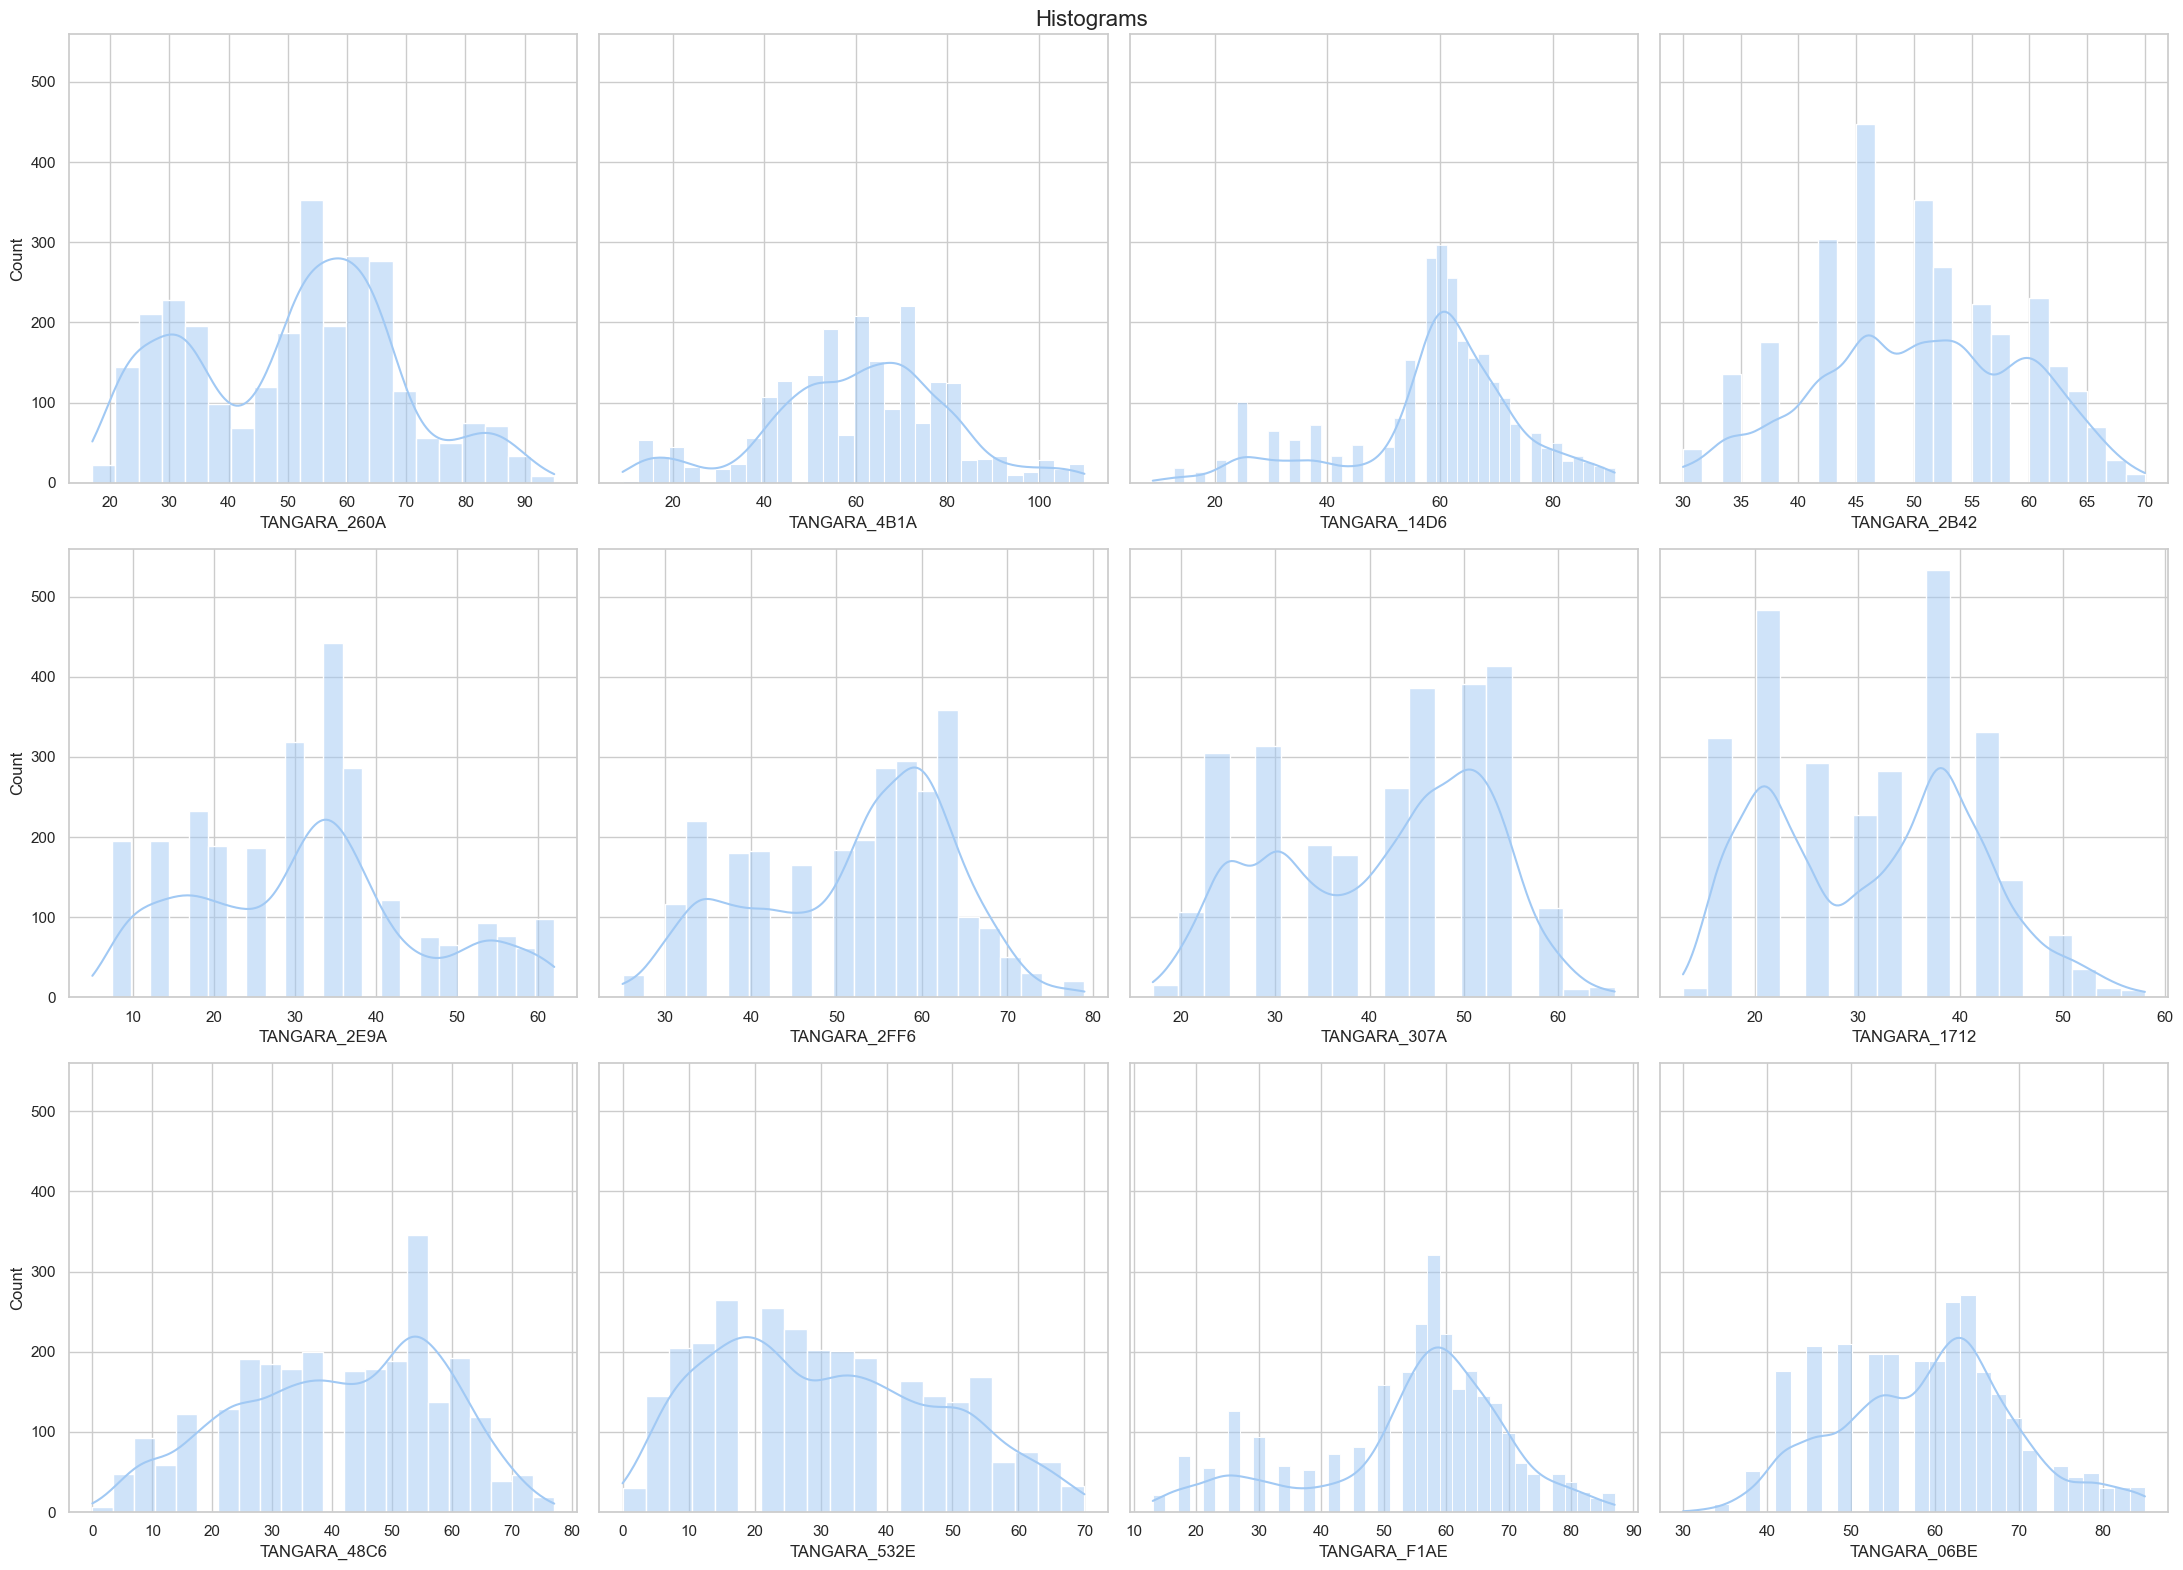

In [6]:
# Plot Histograms
plot_hist(df_aqi)

## Boxplots

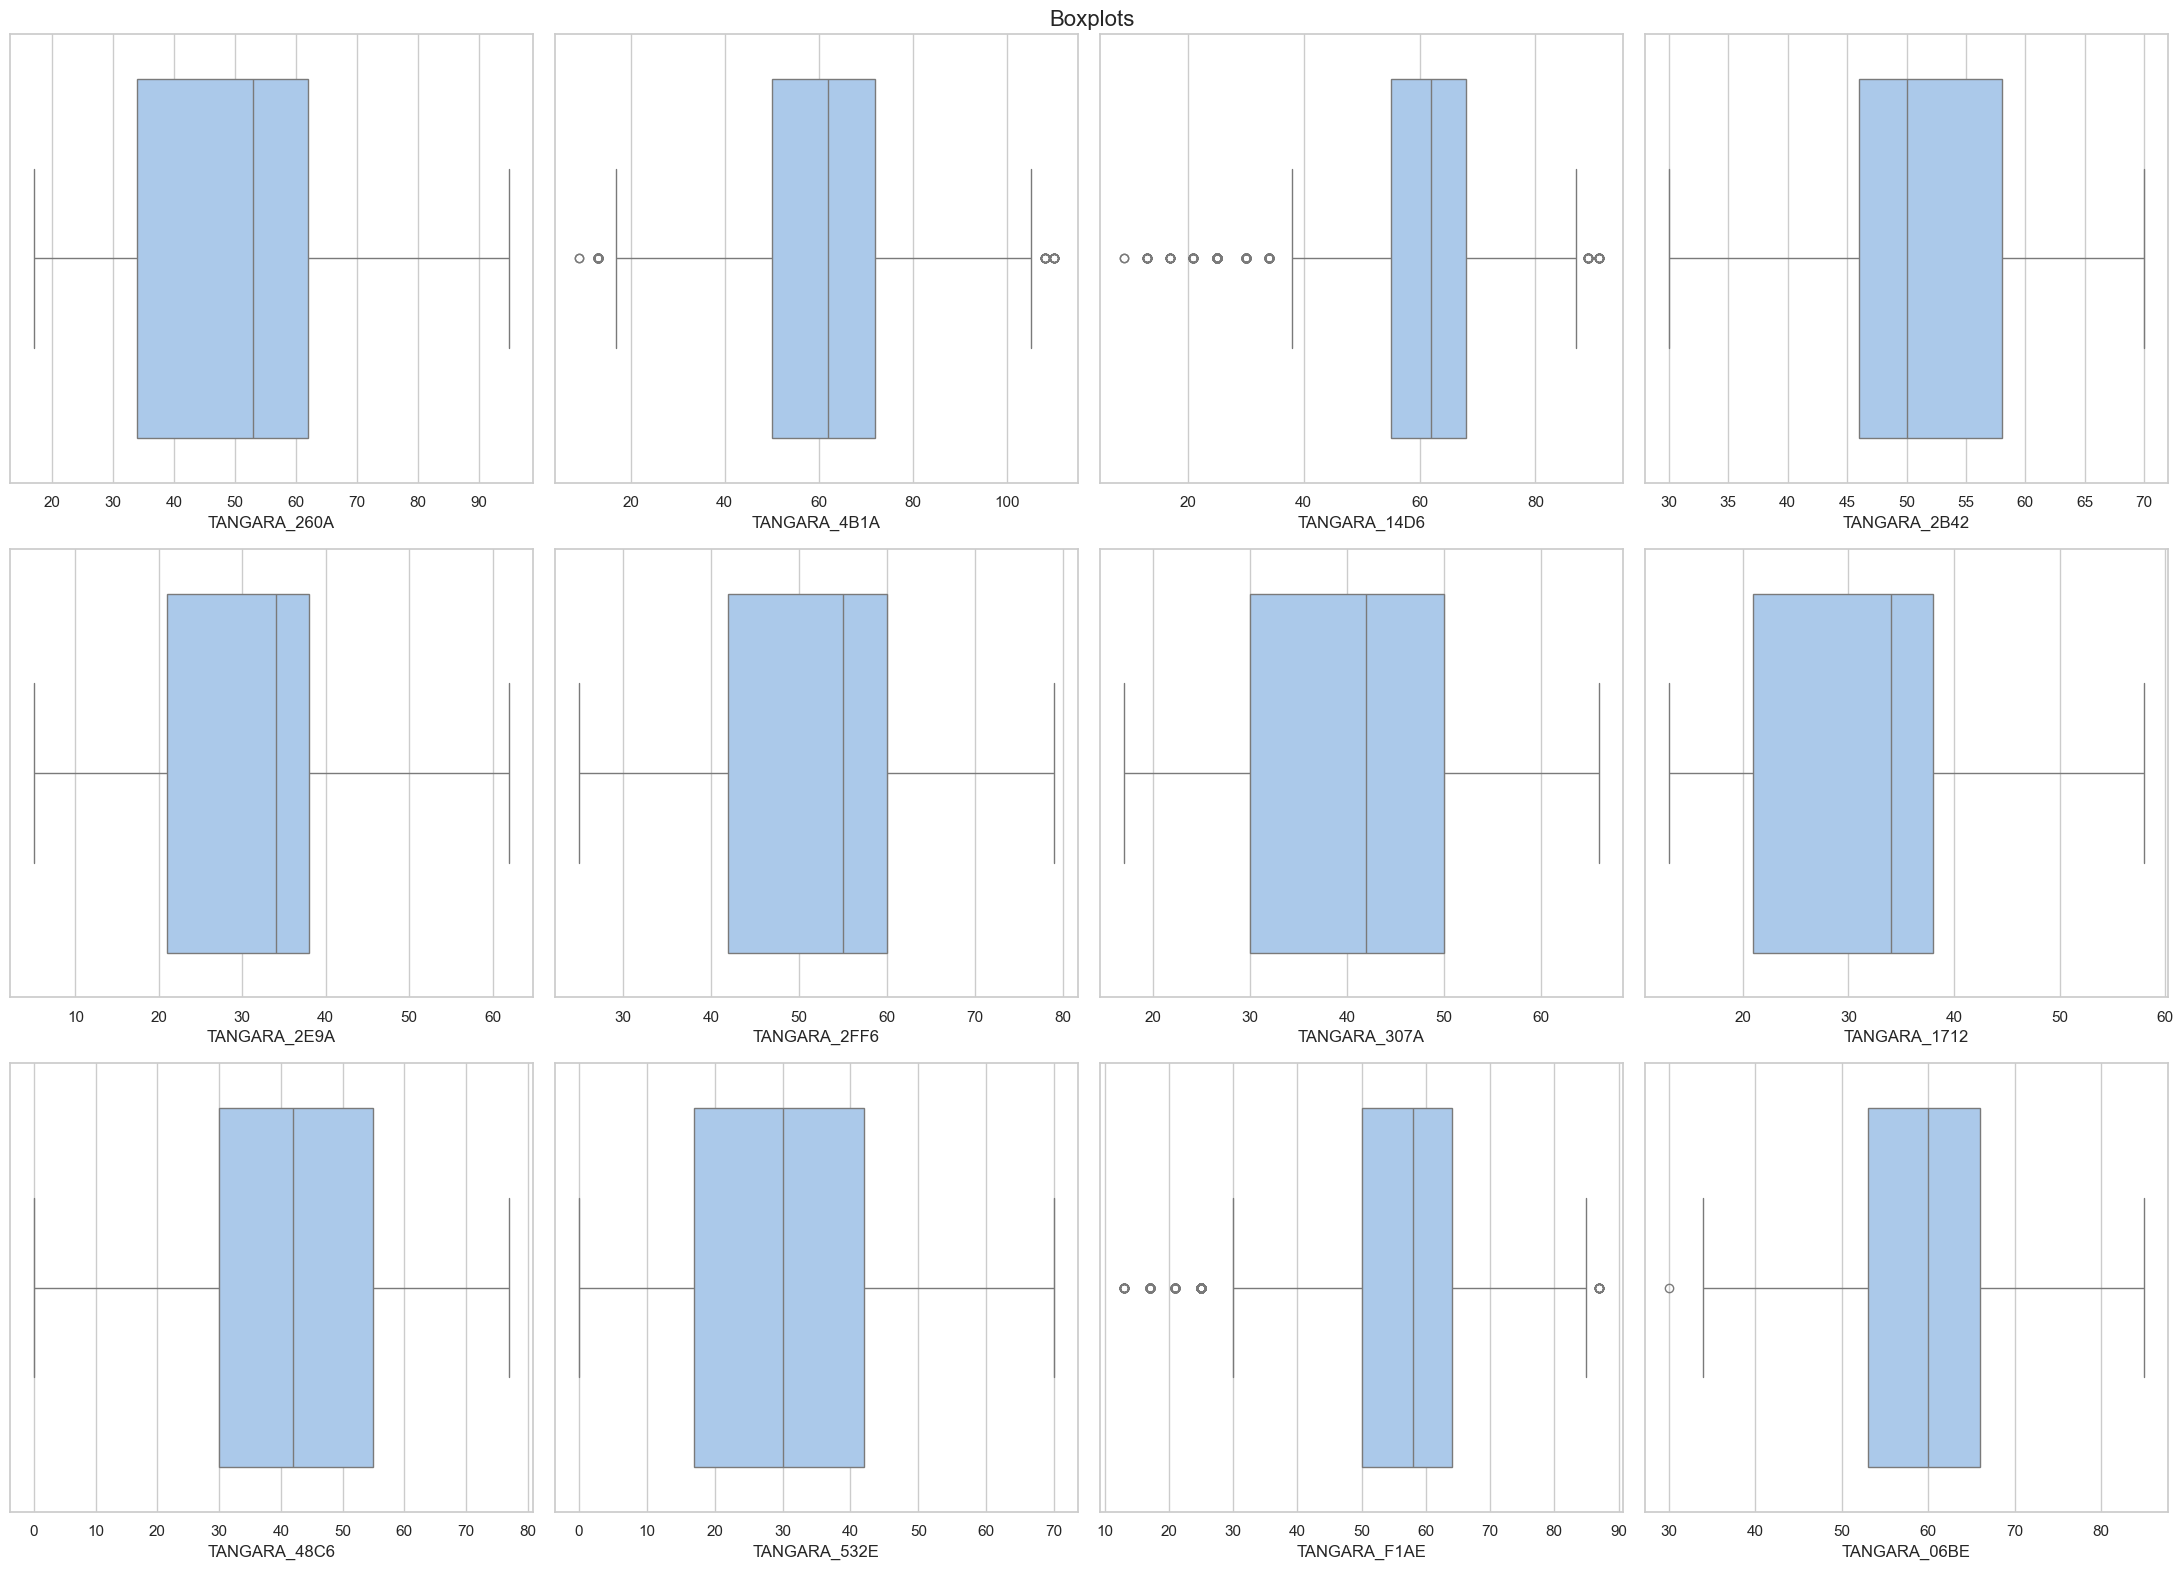

In [7]:
# Plot Boxplots
plot_boxes(df_aqi)

## Lineplots

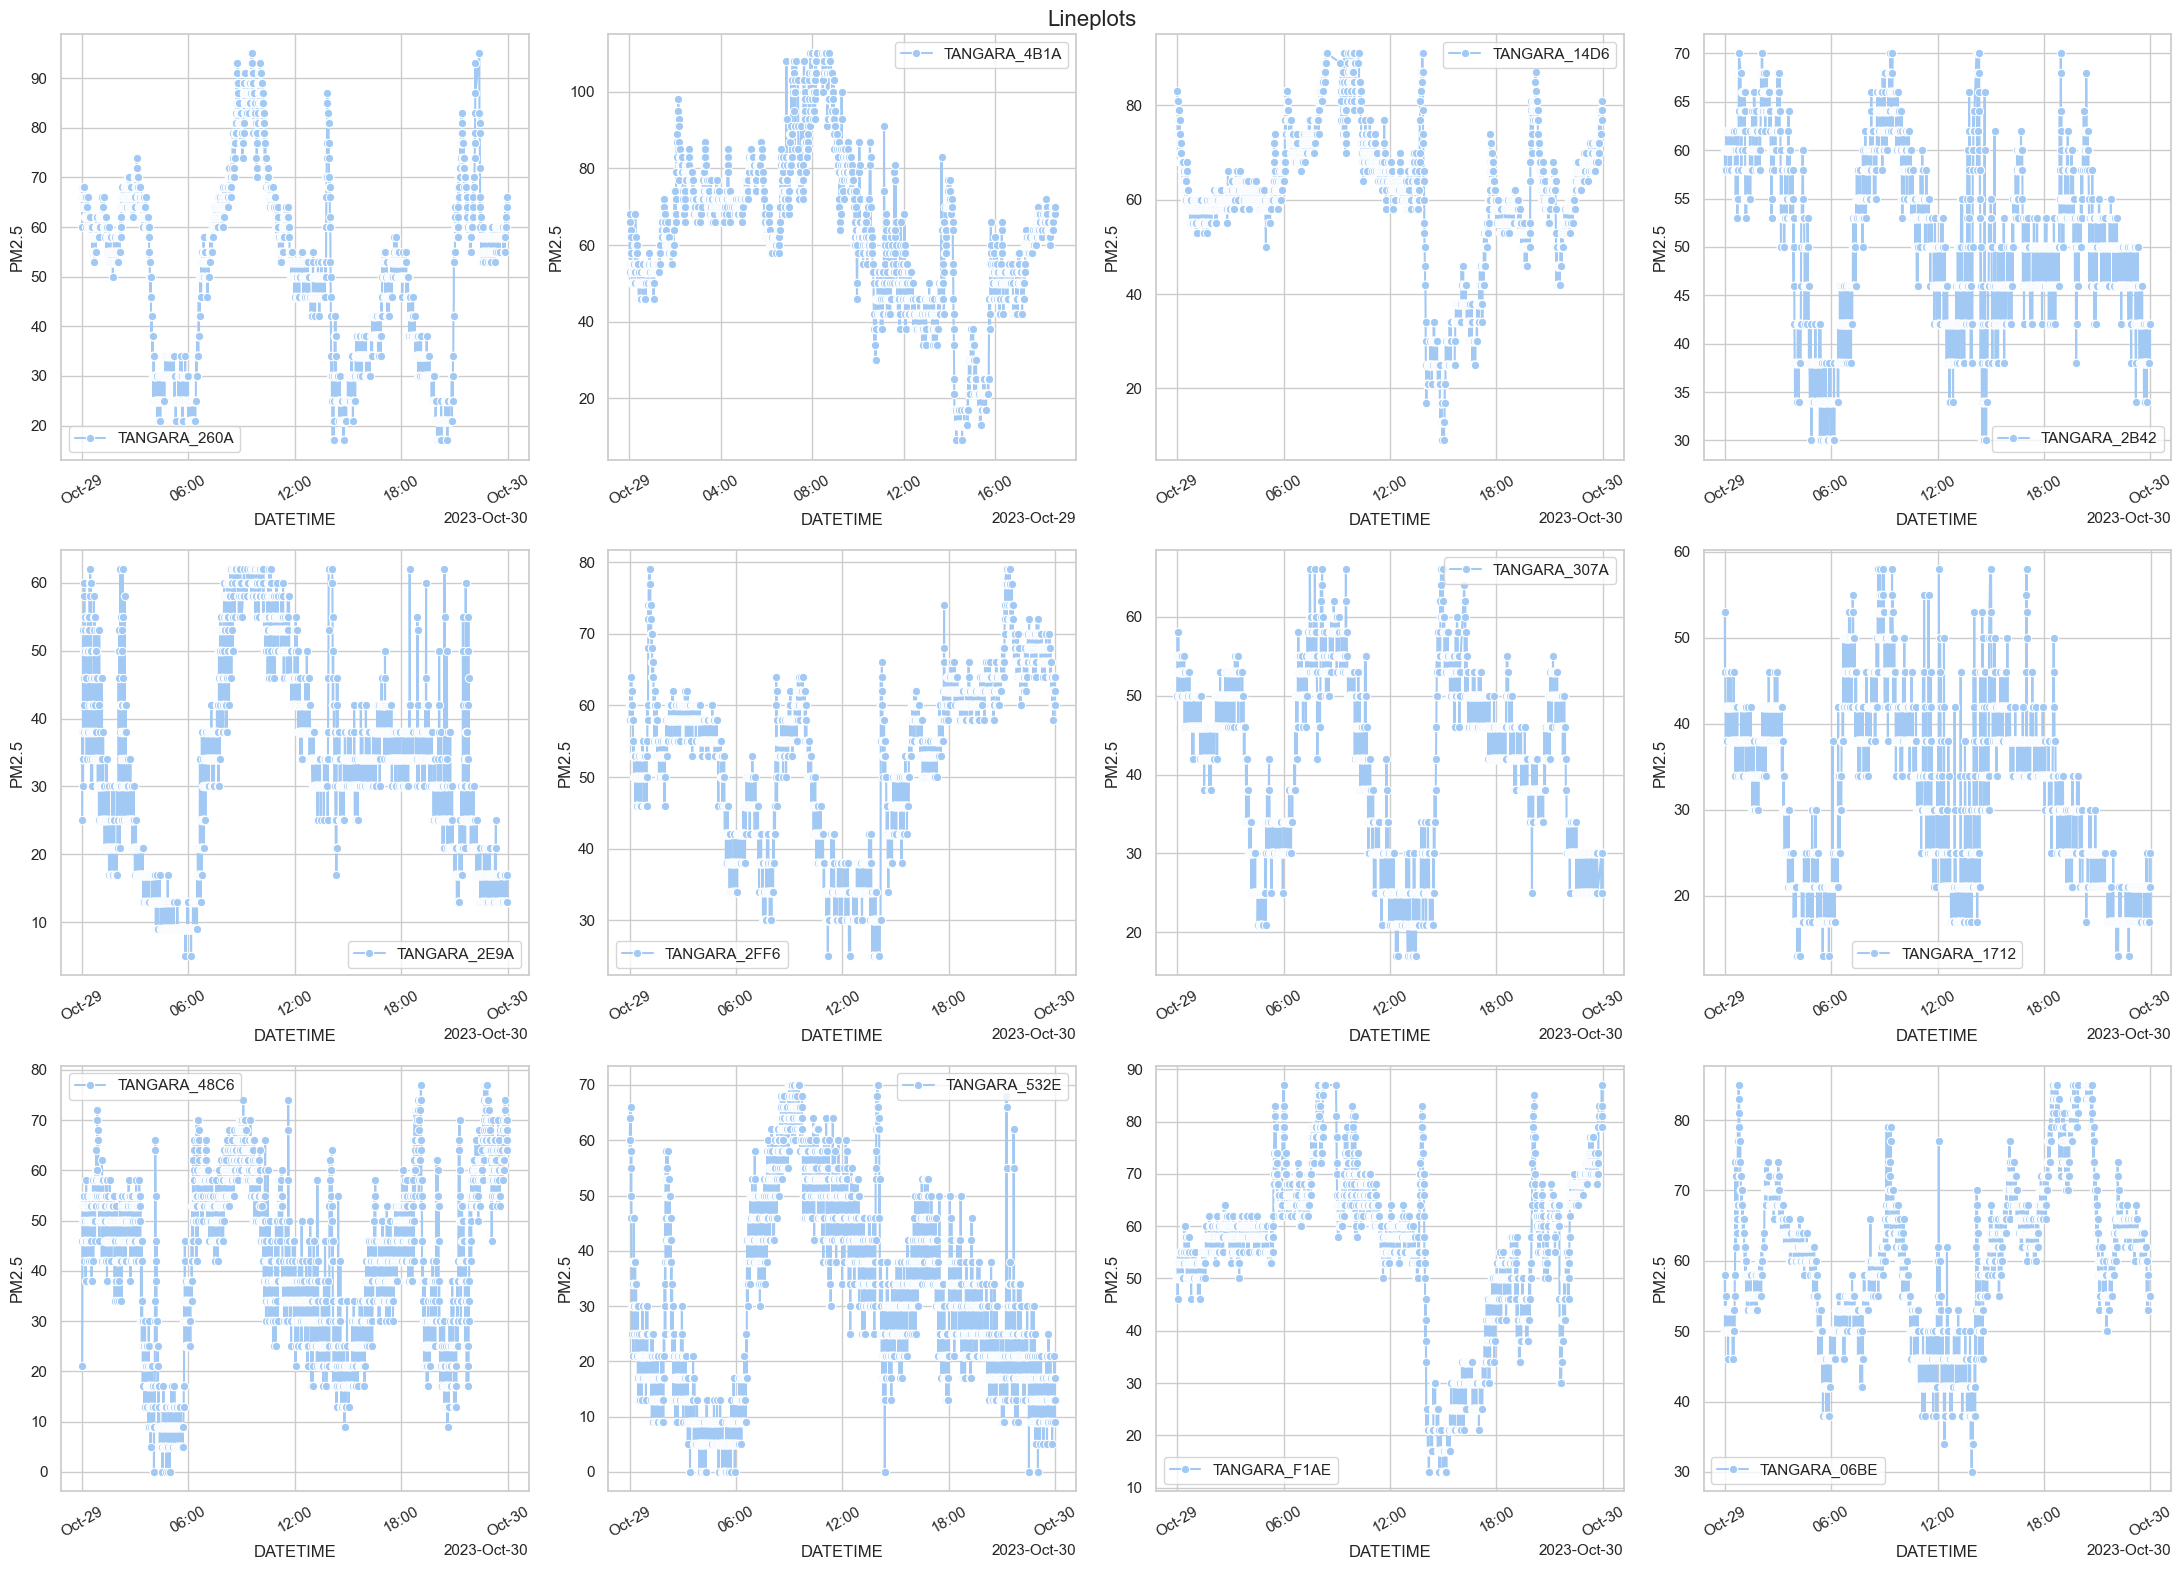

In [8]:
# Plot Lineplots
plot_lines(df_aqi)

In [9]:
# Save AQI Data Frame Sensors into CSV file
df_to_csv(df_aqi, "aqi.csv", datafolder='1_clean')